# EDA

## Описание задачи

Есть объявления, полученные с сайта cian.ru о стоимости аренды квартир в Москве. Необходимо создать модель для **прогнозирования стоимости аренды**.

**Имеющиеся признаки:**
target - price - стоиомость аренды
- room_count - количество комнат в квартире (0 - квартира-студия)
- disctrict - округ Москвы
- area - район
- street - улица
- house - номер дома
- metro - ближайшая станция метро
- time_metro - время, которое необходимо затратить, чтобы добраться до ближайшей станции метро
- transport_type - способ передвижения до метро (пешком или на транспорте)
- facilies - удобства (кондиционер, мебель и т. д.) и условия проживания (можно с животными, детьми и т.д.)
- floor - этаж, на котором расположена квартира
- attic - количество этажей в доме
- square - площадь квартиры

## Задача

In [120]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [33]:
df = pd.read_json('cian_data.json')

In [34]:
df.head()

,room_count,price,district,area,street,house,metro,time_metro,facilities,floor,attic,square,transport_type
0,3,80000,ЦАО,Пресненский,Мукомольный проезд,2,Шелепиха,10,"[Можно с животными, Можно с детьми, Ванна, Сти...",15,36,65,пешком
1,3,55000,ЦАО,Мещанский,Банный пер.,4С1,Проспект Мира,5,"[Можно с животными, Можно с детьми, Ванна, Сти...",7,9,60,пешком
2,3,220000,ЦАО,Пресненский,Большая Никитская ул.,49,Баррикадная,10,"[Можно с детьми, Ванна, Стиральная машина, Пос...",9,14,100,пешком
3,3,150000,ЦАО,Пресненский,Большой Козихинский пер.,4,Пушкинская,7,"[Можно с животными, Можно с детьми, Стиральная...",2,4,80,пешком
4,3,350000,ЦАО,Арбат,ул. Новый Арбат,32,Смоленская,7,"[Можно с животными, Можно с детьми, Ванна, Сти...",4,13,110,пешком


In [35]:
df.shape

(24387, 13)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24387 entries, 0 to 24388
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   room_count      24387 non-null  int64 
 1   price           24387 non-null  int64 
 2   district        24387 non-null  object
 3   area            24387 non-null  object
 4   street          24387 non-null  object
 5   house           24339 non-null  object
 6   metro           24042 non-null  object
 7   time_metro      24387 non-null  int64 
 8   facilities      24387 non-null  object
 9   floor           24387 non-null  int64 
 10  attic           24387 non-null  int64 
 11  square          24387 non-null  int64 
 12  transport_type  23645 non-null  object
dtypes: int64(6), object(7)
memory usage: 2.6+ MB


In [37]:
df.isna().sum()

room_count          0
price               0
district            0
area                0
street              0
house              48
metro             345
time_metro          0
facilities          0
floor               0
attic               0
square              0
transport_type    742
dtype: int64

In [38]:
df.describe()

,room_count,price,time_metro,floor,attic,square
count,24387.000000,2.438700e+04,24387.000000,24387.000000,24387.000000,24387.000000
mean,2.167548,1.082806e+05,9.419363,8.473162,16.028089,88.082421
std,1.139089,1.554696e+05,6.345109,8.127670,12.686037,1367.136704
min,0.000000,1.000000e+04,1.000000,1.000000,1.000000,10.000000
25%,1.000000,4.300000e+04,5.000000,4.000000,9.000000,40.000000
50%,2.000000,6.000000e+04,9.000000,6.000000,14.000000,55.000000
75%,3.000000,1.100000e+05,12.000000,11.000000,19.000000,82.000000
max,6.000000,3.000000e+06,110.000000,84.000000,97.000000,170000.000000


In [39]:
df.describe(include=["object", "bool"])

,district,area,street,house,metro,facilities,transport_type
count,24387,24387,24387,24339,24042,24387,23645
unique,9,120,1860,2305,297,937,2
top,ЦАО,Пресненский,1-й Красногвардейский проезд,3,Смоленская,"[Можно с детьми, Ванна, Стиральная машина, Меб...",пешком
freq,5241,1596,418,669,341,1382,21517


In [135]:
# удалим выбросы
df = df.drop(
    df.query('(square > 500 and price < 350000) or time_metro>40').index)

In [74]:
df['transport_type'].value_counts()

пешком           21509
на транспорте     2127
Name: transport_type, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Распределение ненормальное


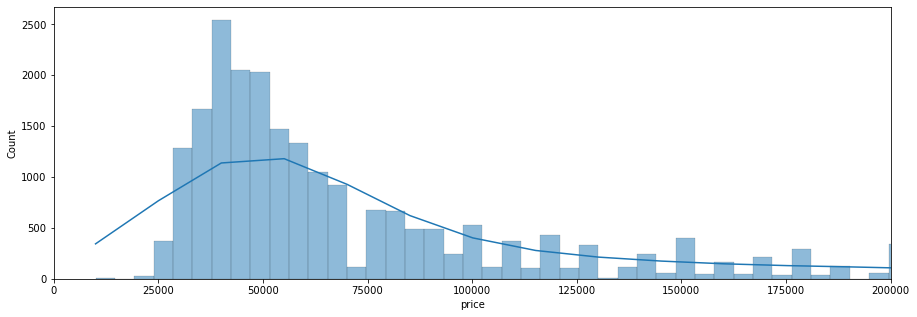

In [75]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.histplot(df.price, kde=True)
ax.set_xlim(0, 200000)

if stats.shapiro(df.price).pvalue >= 0.05:
    print('Распределение нормальное')
else:
    print('Распределение ненормальное')

### Гипотезы

- В ЦАО аренда квартир в целом стоит дороже, чем в остальных районах
-В ЦАО цена аренды за квадратный метр в среднем стоит дороже, чем в остальных районах.
-Чем больше площадь квартиры, тем дороже стоимость аренды.
-Квартиры в шаговой доступности от метро дороже, чем те, от которых необходимо добираться на транспорте.
-Чем больше этажей в доме, тем дороже аренда.
-Аренда на первом и последнем этаже в среднем стоит дешевле, чем на других.
-Чем выше этаж, тем дороже аренда.
-Чем больше комнат в квартире, тем дороже аренда.
-Квартиры с бОльшим количеством удобств и опций стоят дороже, чем без них.
-Квартиры с ванной стоят дороже, чем квартиры с душевыми кабинами.
-Квартиры в исторический районах Москвы стоят дороже, чем в остальных.
-Цена больше у квартир с бОльшим количеством комнат и площадью.

#### Гипотеза 1.

В ЦАО аренда квартир в целом стоит дороже, чем в остальных районах.

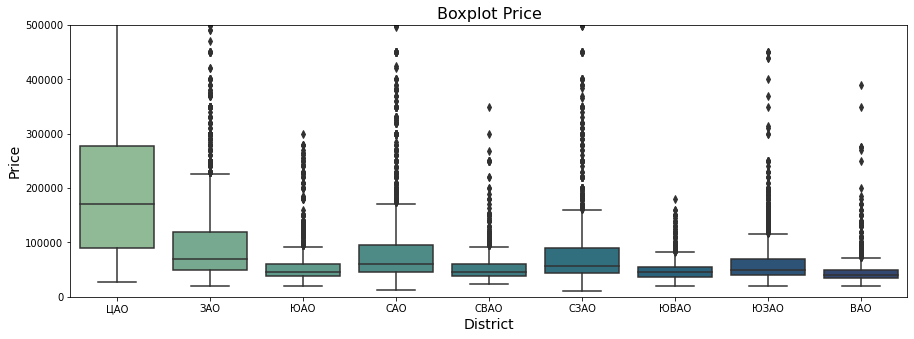

In [76]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(x='district', y='price', data=df, palette='crest')

ax.set_ylim(0, 500000)
ax.set_title('Boxplot Price', fontsize=16)
ax.set_ylabel('Price', fontsize=14)
ax.set_xlabel('District', fontsize=14)
plt.show()

In [77]:
df.groupby('district')['price'].median()

district
ВАО      41000.0
ЗАО      70000.0
САО      60000.0
СВАО     45999.5
СЗАО     56500.0
ЦАО     170000.0
ЮАО      45000.0
ЮВАО     45000.0
ЮЗАО     50000.0
Name: price, dtype: float64

Медианная цена квартиры в ЦАО выше, чем в остальных районах. Гипотеза подтверждена.

#### Гипотеза 2.

В ЦАО цена аренды за квадратный метр в среднем стоит дороже, чем в остальных районах.

In [78]:
df['price_per_meter'] = df['price'] / df['square']

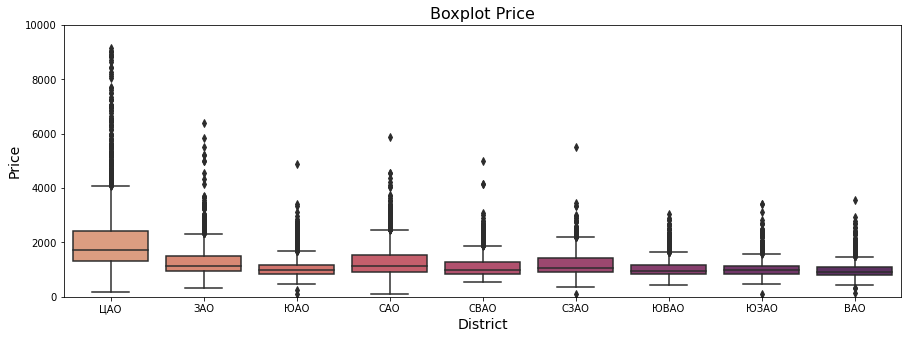

In [79]:
fig, ax = plt.subplots(figsize=(15, 5))

sns.boxplot(x='district', y='price_per_meter', data=df, palette='flare')

ax.set_ylim(0, 10000)
ax.set_title('Boxplot Price', fontsize=16)
ax.set_ylabel('Price', fontsize=14)
ax.set_xlabel('District', fontsize=14)
plt.show()

In [80]:
df.groupby('district')['price_per_meter'].median()

district
ВАО      925.925926
ЗАО     1151.515152
САО     1132.352941
СВАО    1000.000000
СЗАО    1071.428571
ЦАО     1714.285714
ЮАО      974.358974
ЮВАО     961.538462
ЮЗАО     985.797744
Name: price_per_meter, dtype: float64

Медианная цена квадратного метра в ЦАО выше, чем в остальных районах. Гипотеза подтверждена.

#### Гипотеза 3.

Чем больше площадь квартиры, тем дороже стоимость аренды.

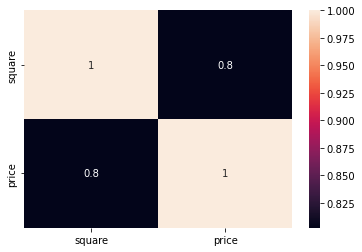

In [81]:
sns.heatmap(df[['square', 'price']].corr(method='spearman'),
            annot=True)
plt.show()

Чем больше площадь, тем дороже стоимость аренды. Гипотеза подтверждена.

#### Гипотеза 4.

Квартиры в шаговой доступности от метро дороже, чем те, от которых необходимо добираться на транспорте.

In [82]:
df.transport_type.unique()

array(['пешком', 'на транспорте', None], dtype=object)

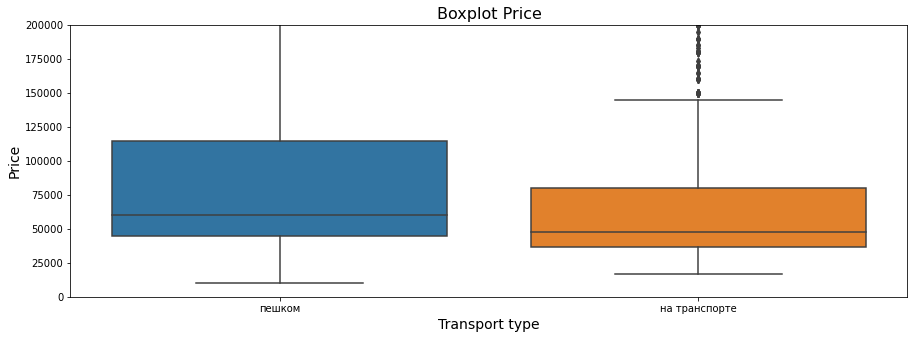

In [83]:
fig, ax = plt.subplots(figsize=(15, 5))

sns.boxplot(x='transport_type', y='price', data=df)

ax.set_ylim(0, 200000)
ax.set_title('Boxplot Price', fontsize=16)
ax.set_ylabel('Price', fontsize=14)
ax.set_xlabel('Transport type', fontsize=14)
plt.show()

In [84]:
df.groupby('transport_type')['price'].median()

transport_type
на транспорте    48000.0
пешком           60000.0
Name: price, dtype: float64

Медианная цена квартиры в шаговой доступности дороже, чем та, до которой необходимо добираться на транспорте. Гипотеза подтверждена.

#### Гипотеза 5.

Чем больше этажей в доме, тем дороже аренда.

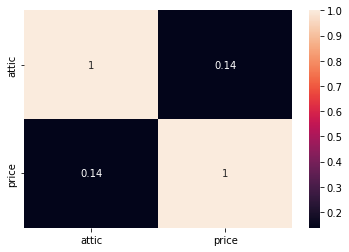

In [85]:
sns.heatmap(df[['attic', 'price']].corr(method='spearman'), annot=True)
plt.show()

Корреляция между количеством этажей и стоимостью аренды отсутствует. Гипотеза опровергнута.

#### Гипотеза 6.

Аренда на первом и последнем этаже в среднем стоит дешевле, чем на других

In [86]:
df['last_first_other'] = df.apply(
    lambda row: 'первый этаж' if row['floor'] == 1 else
    ('последний эатж' if row['floor'] == row['attic'] else 'остальное'),
    axis=1)

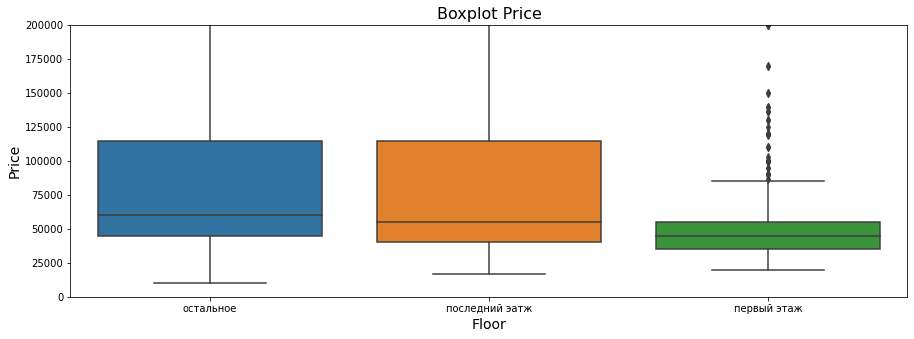

In [87]:
fig, ax = plt.subplots(figsize=(15, 5))

sns.boxplot(x='last_first_other', y='price', data=df)

ax.set_ylim(0, 200000)
ax.set_title('Boxplot Price', fontsize=16)
ax.set_ylabel('Price', fontsize=14)
ax.set_xlabel('Floor', fontsize=14)
plt.show()

In [88]:
df.groupby('last_first_other')['price'].median()

last_first_other
остальное         60000.0
первый этаж       45000.0
последний эатж    55000.0
Name: price, dtype: float64

Медианное значение квартир ниже на первом и последнем этаже. Гипотеза подтверждена.

#### Гипотеза 7.

Чем выше этаж, тем дороже аренда

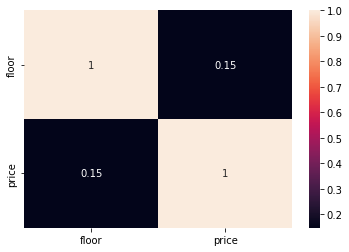

In [89]:
sns.heatmap(df[['floor', 'price']].corr(method='spearman'), annot=True)
plt.show()

Корреляция отсутствует. Гипотеза опровергнута

#### Гипотеза 8.

Чем больше комнат в квартире, тем дороже аренда

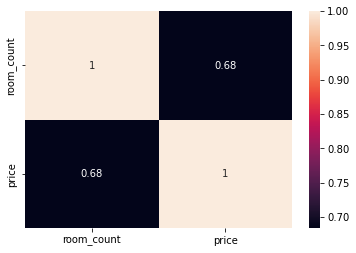

In [90]:
sns.heatmap(df[['room_count', 'price']].corr(method='spearman'), annot=True)
plt.show()

Есть прямая корреляция между количеством комнат в квартире и стоимостью аренды. Гипотеза подтверждена.

#### Гипотеза 9.

Квартиры с бОльшим количеством удобств и опций стоят дороже, чем без них

In [91]:
df['facilities_count'] = df['facilities'].apply(lambda x: len(x))

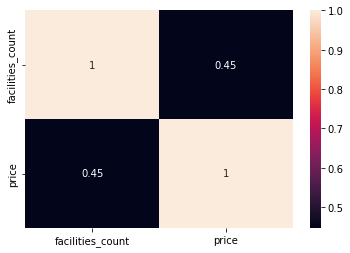

In [92]:
sns.heatmap(df[['facilities_count', 'price']].corr(method='spearman'),
            annot=True)
plt.show()

Корреляция слабая, сложно говорить о значимой линейной зависимости. Гипотеза частично подтверждена.

#### Гипотеза 10.

Квартиры с ванной стоят дороже, чем квартиры с душевыми кабинами.

In [93]:
df["bathroom"] = df["facilities"].apply(
    lambda x: "ванна+душевая" if "Ванна" in x and "Душевая кабина" in x else
    ("ванна" if "Ванна" in x else ("душевая"
                                   if "Душевая кабина" in x else None)))

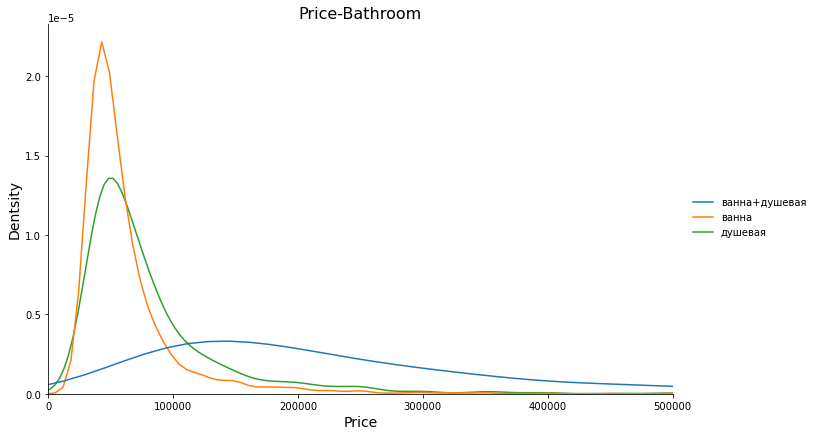

In [117]:
sns.displot(
    {
        "ванна+душевая": df[df.bathroom == 'ванна+душевая'].price,
        "ванна": df[df.bathroom == 'ванна'].price,
        "душевая": df[df.bathroom == 'душевая'].price,
    },
    kind="kde",
    common_norm=False,
    height=6,
    aspect=1.6)

plt.title('Price-Bathroom', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Dentsity', fontsize=14)

plt.xlim(0, 500000)

plt.show()

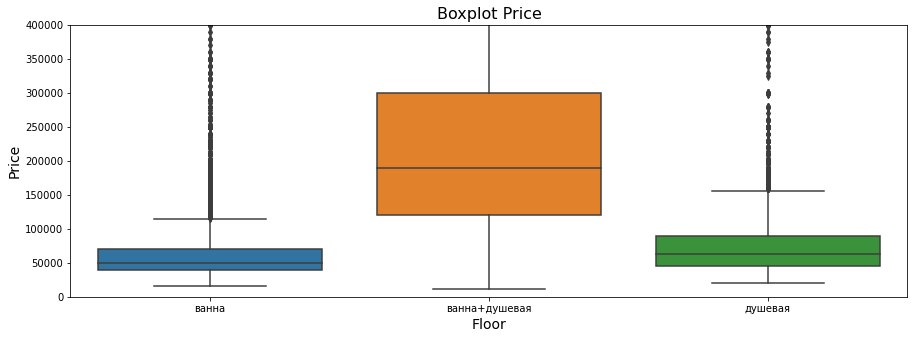

In [94]:
fig, ax = plt.subplots(figsize=(15, 5))

sns.boxplot(x='bathroom', y='price', data=df)

ax.set_ylim(0, 400000)
ax.set_title('Boxplot Price', fontsize=16)
ax.set_ylabel('Price', fontsize=14)
ax.set_xlabel('Floor', fontsize=14)
plt.show()

In [95]:
df.groupby('bathroom')['price'].median()

bathroom
ванна             50000.0
ванна+душевая    190000.0
душевая           63000.0
Name: price, dtype: float64

Квартиры с душевой стоят дороже, чем квартиры с ванной. Гипотеза опровергнута.

#### Гипотеза 11.

Квартиры в исторический районах Москвы стоят дороже, чем в остальных.

In [96]:
hist_reg = [
    'Китай-город', 'Замоскворечье', 'Басманный', 'Таганский', 'Пресненский',
    'Арбат'
]

In [97]:
df['hist_reg'] = df['area'].apply(lambda x: 'исторический'
                                  if x in hist_reg else 'не исторический')

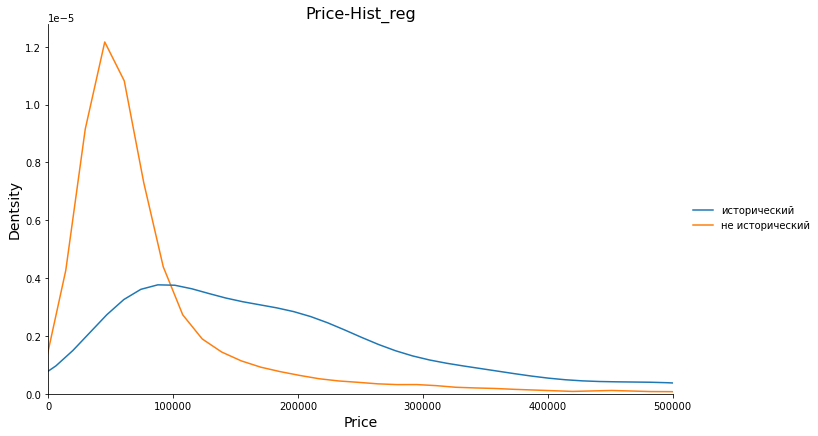

In [114]:
sns.displot(
    {
        "исторический": df[df.hist_reg == 'исторический'].price,
        "не исторический": df[df.hist_reg == 'не исторический'].price,
    },
    kind="kde",
    common_norm=False,
    height=6,
    aspect=1.6)

plt.title('Price-Hist_reg', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Dentsity', fontsize=14)

plt.xlim(0, 500000)

plt.show()

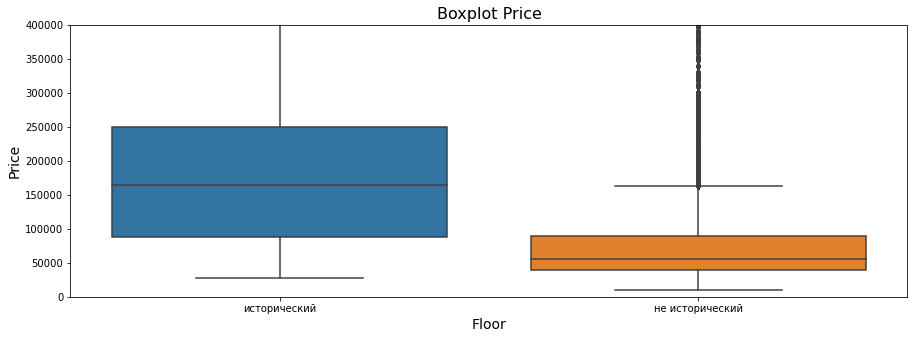

In [98]:
fig, ax = plt.subplots(figsize=(15, 5))

sns.boxplot(x='hist_reg', y='price', data=df)

ax.set_ylim(0, 400000)
ax.set_title('Boxplot Price', fontsize=16)
ax.set_ylabel('Price', fontsize=14)
ax.set_xlabel('Floor', fontsize=14)
plt.show()

In [99]:
df.groupby('hist_reg')['price'].median()

hist_reg
исторический       165000.0
не исторический     55000.0
Name: price, dtype: float64

Аренда квартиры в историческом районе Москвы стоит дороже, чем не в историческом. Гипотеза подтверждена.

#### Гипотеза 12.

Цена больше у квартир с бОльшим количеством комнат и площадью.

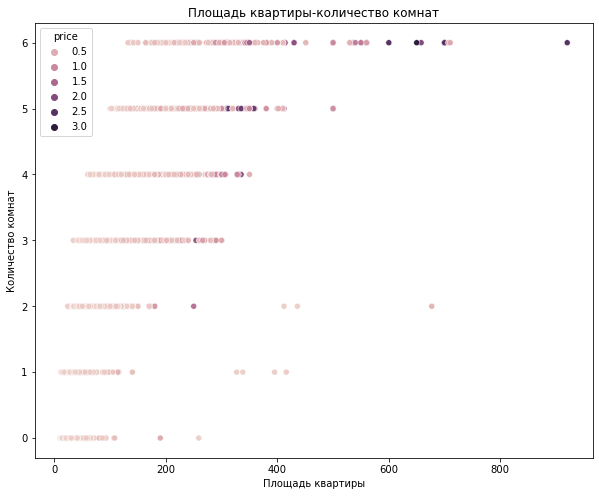

In [136]:
plt.figure(figsize=(10, 8))

sns.scatterplot(data=df, x='square', y='room_count', hue='price')
plt.xlabel('Площадь квартиры')
plt.ylabel('Количество комнат')
plt.title('Площадь квартиры-количество комнат')

plt.show()

In [137]:
med_price_room_square = df.groupby(['room_count','square'])['price'].median()

In [138]:
med_price_room_square

room_count  square
0           10          27000.0
            11          30000.0
            12          30000.0
            13          26000.0
            14          32000.0
                        ...    
6           658       1990000.0
            700       2500000.0
            707        580000.0
            710        580000.0
            920       2500000.0
Name: price, Length: 883, dtype: float64

Гипотеза подтверждена.